# Washing Machine

---

## 목적: 세탁기에서 생성된 Log Data 분석

## 데이터 셋 정보 (Metadata)

- **washing_machine.csv**: 세탁기에서 생성된 Log 데이터
- **wm_metadata.csv**: 각 컬럼 내용에 대한 설명

---

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Pandas option
#pd.set_option('max_rows', 30)
#pd.set_option('max_columns', 15)

# 시각화 스타일 설정
# plt.style.use('fivethirtyeight') 
# sns.set_style('whitegrid')

#import warnings
#warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True

# 1. 데이터 탐색

### 1.1 CSV 파일 읽어오기

In [3]:
pd.read_csv('data/wm_metadata.csv')

,﻿column_name,description
0,category_code,카테고리 코드
1,model_name,모델명
2,regist_country,등록국가명
3,create_dt_utc,세탁종료시간
4,device_id,세탁기 Device 구분을 위한 고유ID(decoded)
5,event_type,세탁기 상태 구분
6,mon_data,인코딩된 세탁기 운전 데이터
7,State,세탁기의 현재 상태 정보
8,Remain_Time_H,세탁기의 현재 남은 시간 정보(Hour)
9,Remain_Time_M,세탁기의 현재 남은 분(Minute)


In [4]:
df = pd.read_csv('data/washing_machine.csv')
df

,﻿category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,ChildLock,Steam,RemoteStart,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,40,0,11,...,0,0,0,0,0,30,63,2,21,1
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,30,0,11,...,0,0,0,0,0,60,63,3,21,5
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,0,0,30,63,3,21,0
5,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,0,0,30,63,3,21,0
6,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_WASH_BEGIN,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,40,0,57,...,0,0,0,0,0,60,63,3,21,5
7,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_STATE,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,40,0,57,...,0,0,0,0,0,60,63,3,21,5
8,201,LG_WM_KR,KR,16/11/2017 3:26,A1,WM_STATE,MgAeADkBAAAAAAAHAAAABAAA5ig/AxUF,50,0,30,...,0,0,0,0,0,40,63,3,21,5
9,201,LG_WM_KR,KR,16/11/2017 3:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAADgTI/AxUA,60,0,0,...,0,0,0,0,0,50,63,3,21,0


### 1.2 데이터 살펴보기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
﻿category_code    500 non-null int64
model_name        500 non-null object
regist_country    500 non-null object
create_dt_utc     500 non-null object
device_id         500 non-null object
event_type        500 non-null object
mon_data          500 non-null object
State             500 non-null int64
Remain_Time_H     500 non-null int64
Remain_Time_M     500 non-null int64
Initial_Time_H    500 non-null int64
Initial_Time_M    500 non-null int64
APCourse          500 non-null int64
Error             500 non-null int64
SoilLevel         500 non-null int64
SpinSpeed         500 non-null int64
WaterTemp         500 non-null int64
RinseCount        500 non-null int64
DryLevel          500 non-null int64
Reserve_Time_H    500 non-null int64
Reserve_Time_M    500 non-null int64
FreshCare         500 non-null int64
ChildLock         500 non-null int64
Steam             500 non-null int64
R

In [6]:
df.shape

(500, 32)

In [7]:
df.head()

,﻿category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,ChildLock,Steam,RemoteStart,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,40,0,11,...,0,0,0,0,0,30,63,2,21,1
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,30,0,11,...,0,0,0,0,0,60,63,3,21,5
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,0,0,30,63,3,21,0


In [8]:
df.columns

Index(['﻿category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel'],
      dtype='object')

### 1.3 임의 데이터 생성

> 분석을 위한 임의 변수들을 기존 데이터 프레임에 추가해보자.
>
> 1. 세제량 : 1 ~ 5 임의 생성
> 2. 세탁기 소음 : 40 ~ 70 임의 생성

In [9]:
new_df = pd.DataFrame({'Detergent' : np.random.randint(1, 6, size=len(df)),
                       'NoiseLevel': np.random.randint(40, 71, size=len(df))})
new_df.head()

,Detergent,NoiseLevel
0,1,67
1,1,51
2,2,65
3,4,70
4,3,66


### 1.4 DataFrame 결합

In [10]:
df = pd.concat([df, new_df], axis=1)
df

,﻿category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,RemoteStart,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,40,0,11,...,0,0,0,30,63,2,21,1,1,67
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,40,63,3,21,0,1,51
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,40,63,3,21,0,2,65
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,30,0,11,...,0,0,0,60,63,3,21,5,4,70
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,30,63,3,21,0,3,66
5,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,30,63,3,21,0,4,67
6,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_WASH_BEGIN,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,40,0,57,...,0,0,0,60,63,3,21,5,4,67
7,201,LG_WM_KR,KR,16/11/2017 2:58,A1,WM_STATE,KAA5ADkBAAAEAAAHAAAAAAAAEDw/AxUF,40,0,57,...,0,0,0,60,63,3,21,5,2,55
8,201,LG_WM_KR,KR,16/11/2017 3:26,A1,WM_STATE,MgAeADkBAAAAAAAHAAAABAAA5ig/AxUF,50,0,30,...,0,0,0,40,63,3,21,5,2,46
9,201,LG_WM_KR,KR,16/11/2017 3:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAADgTI/AxUA,60,0,0,...,0,0,0,50,63,3,21,0,2,68


In [11]:
df.columns

Index(['﻿category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel',
       'Detergent', 'NoiseLevel'],
      dtype='object')

In [102]:
df.shape

(500, 31)

### 1.5 컬럼 삭제

In [103]:
df.drop(['category_code', 'model_name', 'regist_country'], axis=1, inplace=True)

ValueError: labels ['category_code'] not contained in axis

In [104]:
df.shape

(500, 31)

In [105]:
df.columns

Index(['﻿category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'ChildLock', 'Steam',
       'RemoteStart', 'PreState', 'SmartCourse', 'TCLCount', 'OPCourse',
       'LoadLevel', 'Detergent', 'NoiseLevel'],
      dtype='object')

> **Q. 'FreshCare', 'TurboShot', 'InitialBit' 컬럼 제거, DataFrame 확인**

In [106]:
df.drop(['FreshCare', 'TurboShot', 'InitialBit'], axis=1, inplace=True)

ValueError: labels ['FreshCare' 'TurboShot' 'InitialBit'] not contained in axis

In [107]:
df.shape

(500, 31)

In [108]:
df.columns

Index(['﻿category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'ChildLock', 'Steam',
       'RemoteStart', 'PreState', 'SmartCourse', 'TCLCount', 'OPCourse',
       'LoadLevel', 'Detergent', 'NoiseLevel'],
      dtype='object')

### 1.6 Grouping

- **로그 발생 유형 확인**

In [109]:
df['event_type']

0            WM_STATE
1            WM_STATE
2         WM_WASH_END
3      COMMON_WIFI_ON
4            WM_STATE
5         WM_WASH_END
6       WM_WASH_BEGIN
7            WM_STATE
8            WM_STATE
9            WM_STATE
10        WM_WASH_END
11     COMMON_WIFI_ON
12           WM_STATE
13           WM_STATE
14           WM_STATE
15           WM_STATE
16        WM_WASH_END
17     COMMON_WIFI_ON
18           WM_STATE
19           WM_STATE
20        WM_WASH_END
21           WM_STATE
22     COMMON_WIFI_ON
23           WM_STATE
24           WM_STATE
25           WM_STATE
26           WM_STATE
27        WM_WASH_END
28     COMMON_WIFI_ON
29      WM_WASH_BEGIN
            ...      
470     WM_WASH_BEGIN
471          WM_STATE
472          WM_STATE
473          WM_STATE
474          WM_STATE
475          WM_STATE
476       WM_WASH_END
477    COMMON_WIFI_ON
478          WM_STATE
479     WM_WASH_BEGIN
480          WM_PAUSE
481     WM_WASH_BEGIN
482          WM_STATE
483          WM_STATE
484       

In [110]:
df['event_type'].unique()

array(['WM_STATE', 'WM_WASH_END', 'COMMON_WIFI_ON', 'WM_WASH_BEGIN',
       'WM_PAUSE', 'WM_CONTINUE', 'WM_ERROR'], dtype=object)

In [111]:
df['event_type'].value_counts()

WM_STATE          294
COMMON_WIFI_ON     65
WM_WASH_END        64
WM_WASH_BEGIN      40
WM_PAUSE           23
WM_CONTINUE        11
WM_ERROR            3
Name: event_type, dtype: int64

### 1.7 일시중지('WM_PAUSE') Log가 가장 많은 기계의 device_id 찾기

In [112]:
df[df['event_type'] == 'WM_PAUSE']

,﻿category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,ChildLock,Steam,RemoteStart,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
61,201,LG_WM_KR,KR,2017-11-19 04:28:00,A1,WM_PAUSE,BgEAAQANAAICAwQAAAAAAAAAABQ/BxUA,6,1,0,...,0,0,0,20,63,7,21,0,1,65
94,201,LG_WM_KR,KR,2017-11-20 05:43:00,A1,WM_PAUSE,BgAuADkBAAAEAAAHAAAABAAARig/CRUF,6,0,46,...,0,0,0,40,63,9,21,5,2,55
154,201,LG_WM_KR,KR,2017-11-19 04:35:00,A2,WM_PAUSE,BgAnACcBAAIEAwIAAAAAhAAAABQ9IQ4A,6,0,39,...,0,0,0,20,61,33,14,0,1,67
156,201,LG_WM_KR,KR,2017-11-19 04:37:00,A2,WM_PAUSE,BgA7ADsBAAIEAwMAAAAABAAAABQ9IQ4A,6,0,59,...,0,0,0,20,61,33,14,0,5,49
166,201,LG_WM_KR,KR,2017-11-20 03:49:00,A2,WM_PAUSE,BgAnACcBAAIEAwIAAAAAhAAAABc9Ig4B,6,0,39,...,0,0,0,23,61,34,14,1,3,46
169,201,LG_WM_KR,KR,2017-11-20 03:55:00,A2,WM_PAUSE,BgAhACcBAAIEAwIAAAAAhAAAXxc9Ig4B,6,0,33,...,0,0,0,23,61,34,14,1,5,51
172,201,LG_WM_KR,KR,2017-11-20 03:56:00,A2,WM_PAUSE,BgEwATABAAMDAwMAAAAAhAAAABc9Ig4F,6,1,48,...,0,0,0,23,61,34,14,5,4,51
175,201,LG_WM_KR,KR,2017-11-20 03:56:00,A2,WM_PAUSE,BgEmASYBAAIDAwMAAAAABAAAABc9Ig4F,6,1,38,...,0,0,0,23,61,34,14,5,4,59
177,201,LG_WM_KR,KR,2017-11-20 03:56:00,A2,WM_PAUSE,BgEmASYBAAICAwMAAAAAAAAAABc9Ig4F,6,1,38,...,0,0,0,23,61,34,14,5,1,70
208,201,LG_WM_KR,KR,2017-11-16 11:07:00,A3,WM_PAUSE,BgEQARgBAAIFAQQAAAAAhAAADBczJgcC,6,1,16,...,0,0,0,23,51,38,7,2,1,61


In [113]:
df[df['event_type'] == 'WM_PAUSE']['device_id']

61     A1
94     A1
154    A2
156    A2
166    A2
169    A2
172    A2
175    A2
177    A2
208    A3
218    A3
228    A3
239    A3
242    A3
252    A3
255    A3
257    A3
273    A3
283    A3
292    A3
295    A3
459    A5
480    A5
Name: device_id, dtype: object

> **Q. 일시중지(WM_PAUSE)인 device_id를 Grouping 해서 개수를 세어보자**

In [114]:
df[df['event_type']=='WM_PAUSE']['device_id'].value_counts()







A3    12
A2     7
A1     2
A5     2
Name: device_id, dtype: int64

In [115]:
df[df['event_type'] == 'WM_PAUSE']['device_id'].value_counts()

A3    12
A2     7
A1     2
A5     2
Name: device_id, dtype: int64

> **Q. 어느 기계(device_id)에 가장 많은 에러('WM_ERROR') Log가 기록되어 있을까?**

In [116]:
df[df['event_type']=='WM_ERROR']['device_id'].value_counts()














A3    2
A5    1
Name: device_id, dtype: int64

In [117]:
df[df['event_type'] == 'WM_ERROR']['device_id'].value_counts()

A3    2
A5    1
Name: device_id, dtype: int64

### 1.8 Log가 많이 생성된 시간대

####  데이터 타입 확인: 'create_dt_utc'

In [118]:
df['create_dt_utc'].head()

0   2017-11-16 00:22:00
1   2017-11-16 00:32:00
2   2017-11-16 00:32:00
3   2017-11-16 02:48:00
4   2017-11-16 02:57:00
Name: create_dt_utc, dtype: datetime64[ns]

In [119]:
df['create_dt_utc'][0]

Timestamp('2017-11-16 00:22:00')

In [120]:
type(df['create_dt_utc'][0])

pandas.tslib.Timestamp

#### 데이터 타입 변경: String --> Datetime

In [121]:
df['create_dt_utc'] = pd.to_datetime(df['create_dt_utc'])

In [122]:
df['create_dt_utc']

0     2017-11-16 00:22:00
1     2017-11-16 00:32:00
2     2017-11-16 00:32:00
3     2017-11-16 02:48:00
4     2017-11-16 02:57:00
5     2017-11-16 02:57:00
6     2017-11-16 02:58:00
7     2017-11-16 02:58:00
8     2017-11-16 03:26:00
9     2017-11-16 03:57:00
10    2017-11-16 03:57:00
11    2017-11-16 11:14:00
12    2017-11-16 11:15:00
13    2017-11-16 11:30:00
14    2017-11-16 12:08:00
15    2017-11-16 12:18:00
16    2017-11-16 12:18:00
17    2017-11-16 12:21:00
18    2017-11-16 12:50:00
19    2017-11-16 13:21:00
20    2017-11-16 13:21:00
21    2017-11-18 12:18:00
22    2017-11-18 12:18:00
23    2017-11-18 12:19:00
24    2017-11-18 12:34:00
25    2017-11-18 13:20:00
26    2017-11-18 13:30:00
27    2017-11-18 13:30:00
28    2017-11-18 21:09:00
29    2017-11-18 21:09:00
              ...        
470   2017-11-19 08:37:00
471   2017-11-19 08:37:00
472   2017-11-19 08:38:00
473   2017-11-19 08:52:00
474   2017-11-19 09:22:00
475   2017-11-19 09:31:00
476   2017-11-19 09:31:00
477   2017-1

In [123]:
df['create_dt_utc'][0]

Timestamp('2017-11-16 00:22:00')

In [124]:
type(df['create_dt_utc'][0])

pandas.tslib.Timestamp

#### 4시간 단위로 Grouping

In [125]:
grouper = pd.Grouper(key='create_dt_utc', freq='4h')
grouper

In [126]:
gp_4h = df.groupby(grouper)

In [127]:
gp_4h.count()

,﻿category_code,model_name,regist_country,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,Initial_Time_H,...,ChildLock,Steam,RemoteStart,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel,Detergent,NoiseLevel
create_dt_utc,,,,,,,,,,,,,,,,,,,,,
2017-11-16 00:00:00,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2017-11-16 04:00:00,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2017-11-16 08:00:00,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2017-11-16 12:00:00,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2017-11-16 16:00:00,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2017-11-16 20:00:00,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2017-11-17 00:00:00,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2017-11-17 04:00:00,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2017-11-17 08:00:00,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


In [128]:
freq = gp_4h['create_dt_utc'].count()
freq

create_dt_utc
2017-11-16 00:00:00    25
2017-11-16 04:00:00     7
2017-11-16 08:00:00    16
2017-11-16 12:00:00    31
2017-11-16 16:00:00     3
2017-11-16 20:00:00     8
2017-11-17 00:00:00    16
2017-11-17 04:00:00    14
2017-11-17 08:00:00    34
2017-11-17 12:00:00     7
2017-11-17 16:00:00     0
2017-11-17 20:00:00     0
2017-11-18 00:00:00    35
2017-11-18 04:00:00    16
2017-11-18 08:00:00    24
2017-11-18 12:00:00    26
2017-11-18 16:00:00     0
2017-11-18 20:00:00    15
2017-11-19 00:00:00    29
2017-11-19 04:00:00    39
2017-11-19 08:00:00    33
2017-11-19 12:00:00    19
2017-11-19 16:00:00     0
2017-11-19 20:00:00     4
2017-11-20 00:00:00    39
2017-11-20 04:00:00    23
2017-11-20 08:00:00    26
2017-11-20 12:00:00     7
2017-11-20 16:00:00     0
2017-11-20 20:00:00     4
Freq: 4H, Name: create_dt_utc, dtype: int64

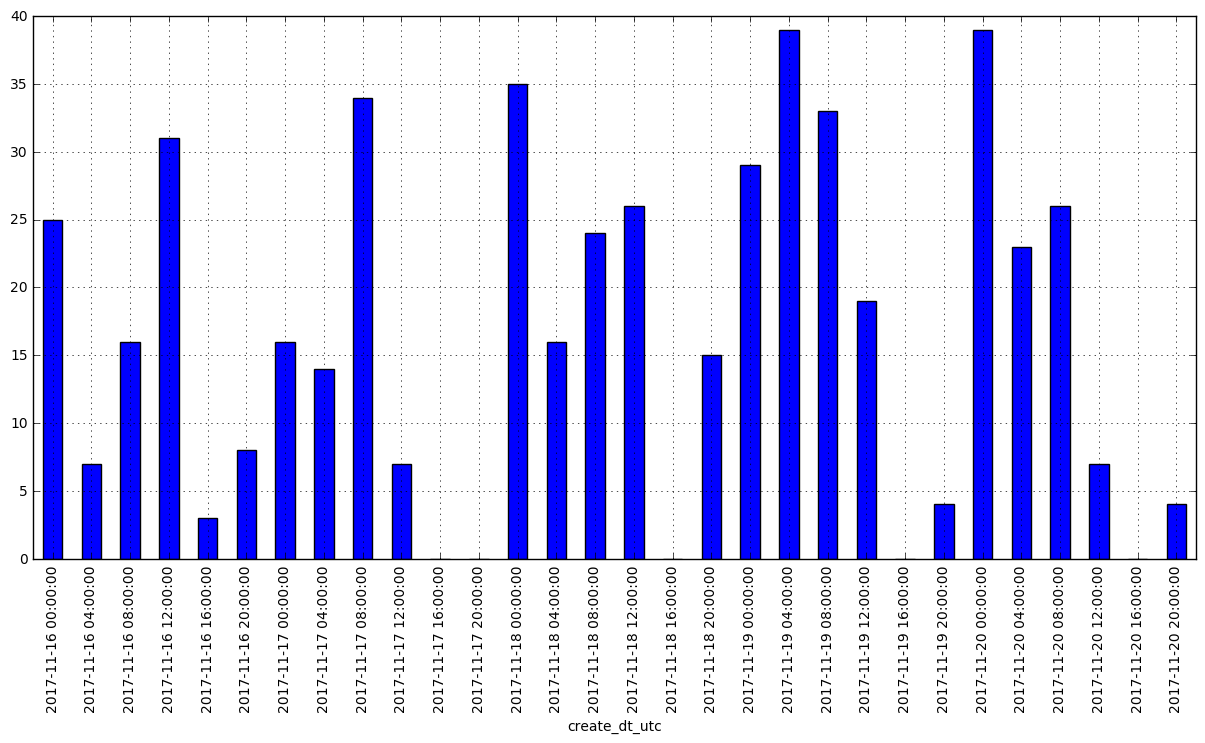

In [129]:
freq.plot(kind='bar', figsize=(15, 7))

#### local time으로 변경: Series의 Index를 변경

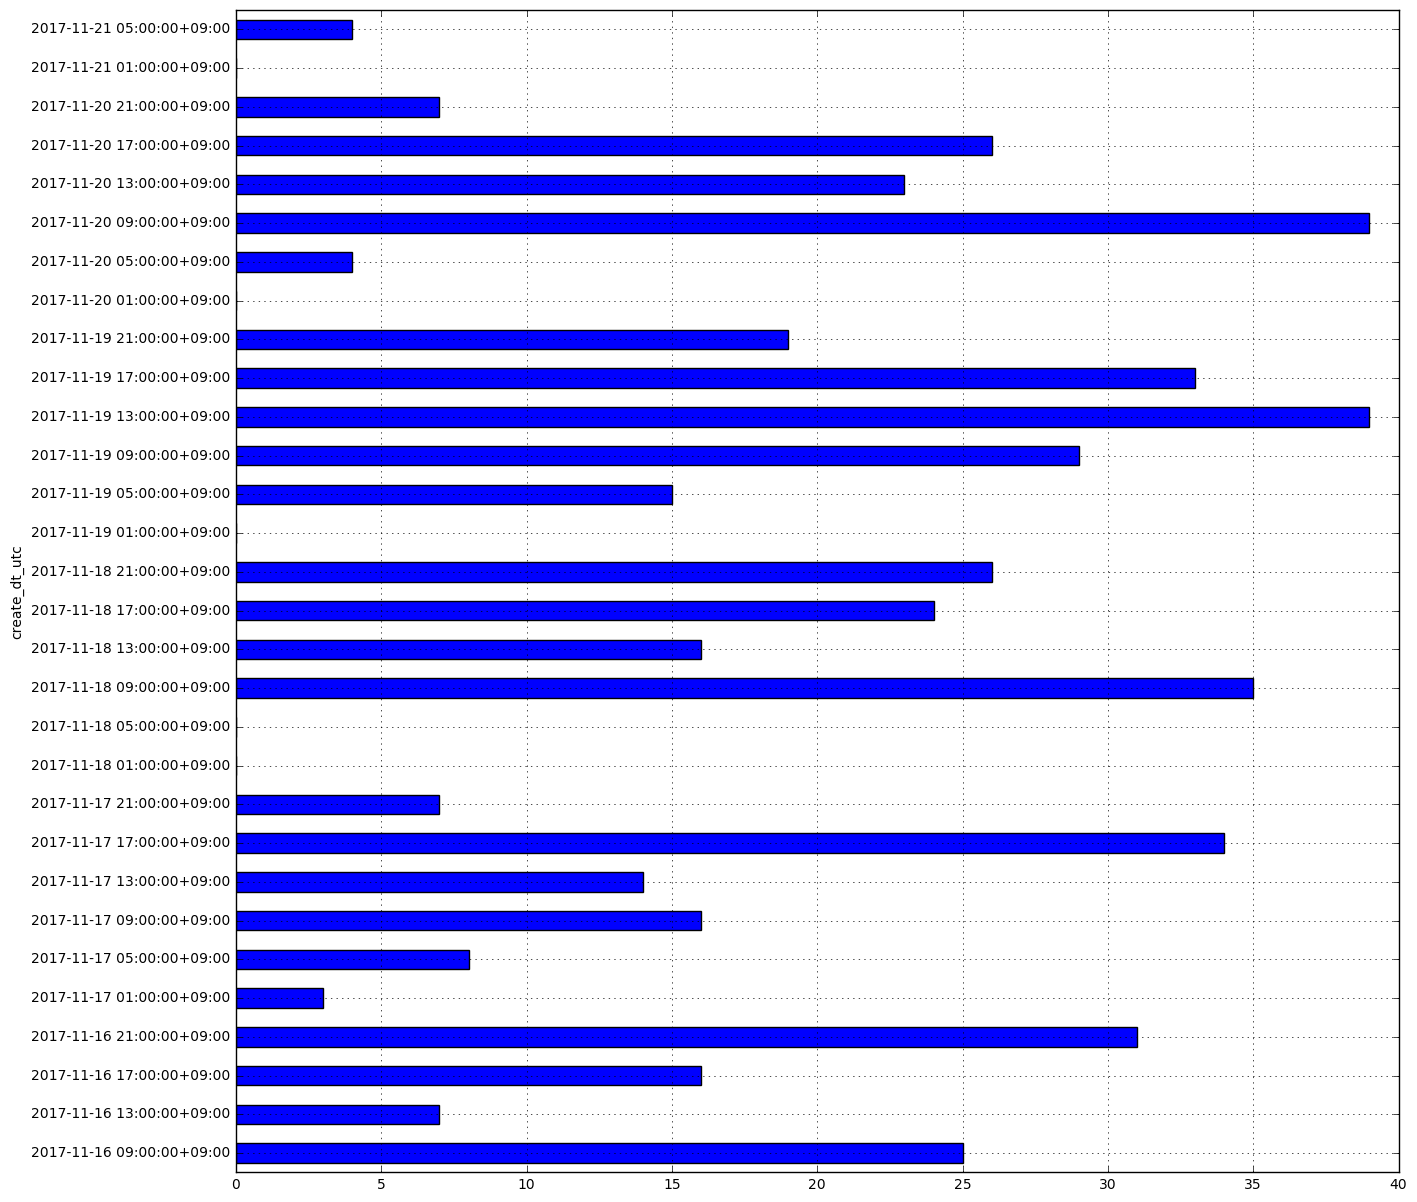

In [130]:
freq.tz_localize('UTC').tz_convert('Asia/Seoul').plot(kind='barh', figsize=(15, 15))

#### local time으로 변경: DataFrame의 컬럼을 변경

In [131]:
import time
from datetime import timedelta

In [132]:
# 컴퓨터에 설정된 타임존과 UTC의 차이 (단위: 초) (UTC - Current Timezone)
time.timezone

-32400

In [133]:
df['create_dt_utc'] - timedelta(seconds=time.timezone)

TypeError: data type "datetime" not understood

> **Q. 한국 시각으로 변경한 데이터를 create_dt_kst 라는 새로운 컬럼에 넣어보자**

In [134]:
df['create_dt_kst'] =  df['create_dt_utc'] - timedelta(seconds=time.timezone)
df

TypeError: data type "datetime" not understood

> **Q. 한국 시각으로 변경된 데이터로 그래프 그리기**

In [98]:
grouper_kst = pd.Grouper(key='create_dt_kst', freq='4h')

In [99]:
freq_kst = df.groupby(grouper_kst)['create_dt_kst'].count()

KeyError: 'The grouper name create_dt_kst is not found'

In [100]:
freq_kst.plot(kind='barh', figsize=(15, 15))

NameError: name 'freq_kst' is not defined

In [101]:
# end of file